In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# load dataset

In [34]:
import chardet

datapath = '/content/drive/MyDrive/ml_code/nlp/sms spam detection/spam.csv'

with open(datapath, 'rb') as f:
    result = chardet.detect(f.read())

df = pd.read_csv(datapath, encoding=result['encoding'])


# understanding data and making df usable

In [35]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [37]:
df.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [38]:
df.columns = ["Label", "Text"]

In [39]:
df["Label"] = df["Label"].map({
    "ham":1,
    "spam":0
})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   int64 
 1   Text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


# handeling missing data

In [41]:
max_non_null_val = df["Text"].count()
print("Percentage of missing values in each column:\n")
missing_percent = []
for col in df.columns:
  missing_percent.append(df[col].isnull().sum()/max_non_null_val*100)
  print(f"{col} : {df[col].isnull().sum()/max_non_null_val*100}%")

Percentage of missing values in each column:

Label : 0.0%
Text : 0.0%


#Loading the Spacy model


In [42]:
# !pip install spacy
# !python -m spacy download en_core_web_md

In [43]:
import spacy
nlp = spacy.load("en_core_web_md")

#preprocessing the data

In [52]:
corpus = []
for i in range(0, df["Text"].count()):
    review = df['Text'][i]
    doc = nlp(review)
    tokens = [token.lemma_.lower() for token in doc if not token.is_punct]
    review = ' '.join(tokens)
    corpus.append(review)

In [51]:
from spacy.lang.en import stop_words
print(stop_words.STOP_WORDS)

{'‘ll', 'you', 'the', 'within', 'sometime', 'and', 'where', '‘d', 'herself', 'of', 'same', 'else', 'ourselves', 'is', 'whole', 'see', 'ever', 'rather', 'otherwise', 'those', 'your', 'elsewhere', 'us', 'almost', 'via', 'neither', 'ten', '’s', 'our', 'ca', '‘m', 'me', 'along', 'herein', 'among', 'nine', 'thru', "n't", 'she', 'both', 'becomes', 'none', 'whereupon', 'unless', 'hers', 'down', 'it', "'s", 'since', 'everything', 'n’t', 'whenever', 'made', 'about', 'myself', 'bottom', 'regarding', 'one', 'whether', 'he', 'hereafter', 'anything', 'always', 'anyone', 'least', 'nobody', 'whatever', 'another', 'nowhere', 'whose', 'could', 'whereby', 'take', '‘ve', 'perhaps', '’d', 'again', 'five', 'did', 'everywhere', 'any', 'whereas', 'latterly', 'off', 'their', 'doing', 'often', 'name', 'was', 'top', 'further', '‘re', 'by', 'mine', 'become', 'eleven', 'be', 'thence', 'formerly', 'may', "'re", 'eight', 'out', 'towards', 'latter', 'because', 'cannot', 'afterwards', 'during', 'from', 'him', 'thereu

In [55]:
indexes = []
for index, sentence in enumerate(corpus):
    if sentence.strip() == "":
        print(index)
        print(df["Text"][index])
        print(sentence)
        indexes.append(index)

df.drop(index=indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

3374
:) 

4822
:-) :-)



In [56]:
for i in indexes:
  corpus.pop(i)

# Creating bag of words model

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = df["Label"].values

## Splitting data into training and testing datasets

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = df["Label"])

##Scaling the data

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Training naive bayes model

In [60]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

0.9865350089766607

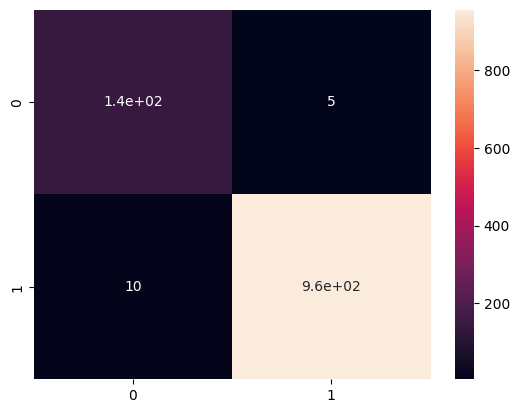

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##Training Logistic regression model



In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

0.9883303411131059

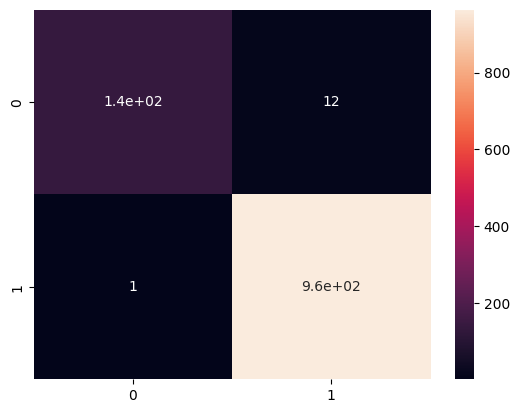

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##XG boost model

In [64]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

0.9847396768402155

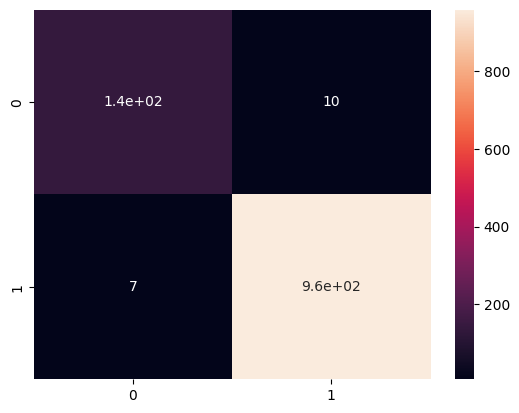

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)


##Training a random forest model

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

0.9865350089766607

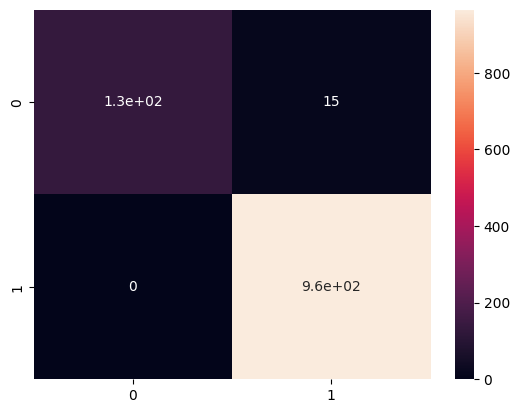

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##Training a svc model

In [68]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

0.9820466786355476

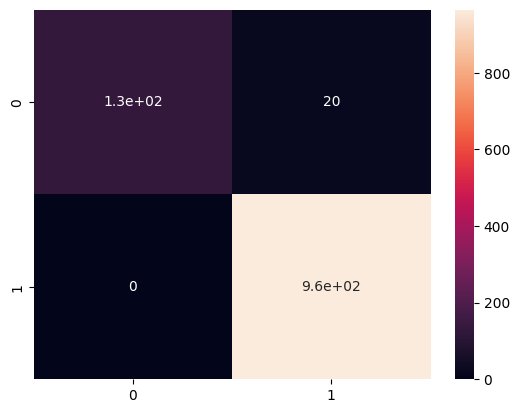

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

# Creating TF-IDF model

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
X = tv.fit_transform(corpus).toarray()
y = df["Label"].values


## Splitting data into training and testing datasets

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

##Scaling the data

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Training naive bayes model

In [73]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

0.983243566726511

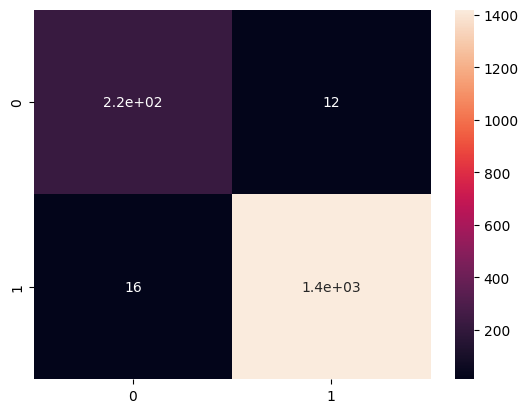

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##Training Logistic regression model



In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

0.9802513464991023

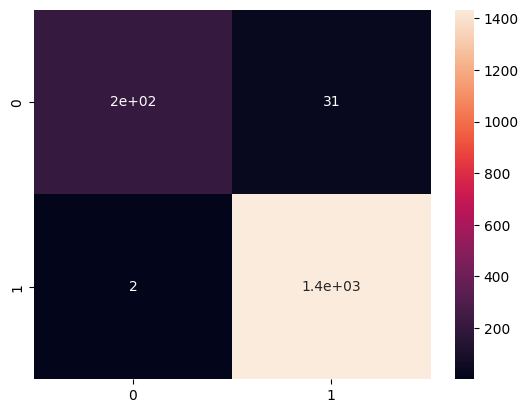

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##XG boost model

In [77]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

0.9718731298623579

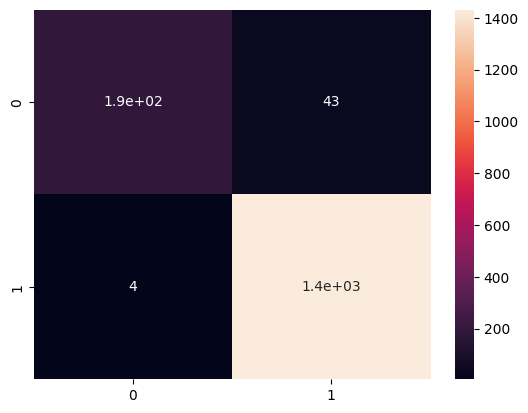

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)


##Training a random forest model

In [79]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

0.9772591262716936

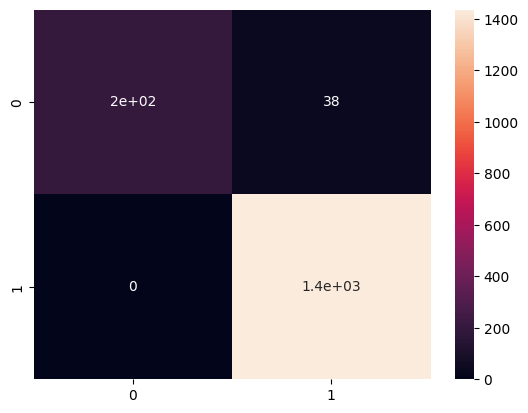

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##Training a svc model

In [81]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

0.9664871334530222

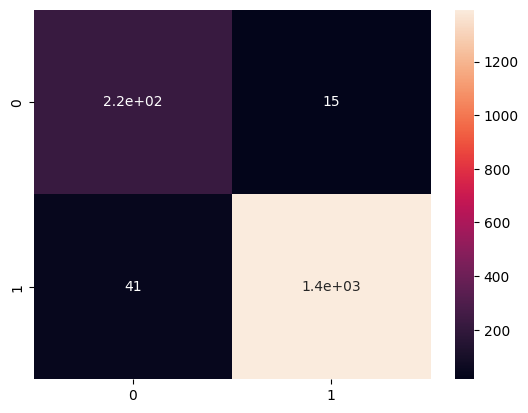

In [82]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

# Creating word vectors model

In [83]:
X=[]
for i in corpus:
  X.append(nlp(i).vector)

In [84]:
y = df["Label"].values


## Splitting data into training and testing datasets

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

##Scaling the data

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Training naive bayes model

In [87]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

0.8824057450628366

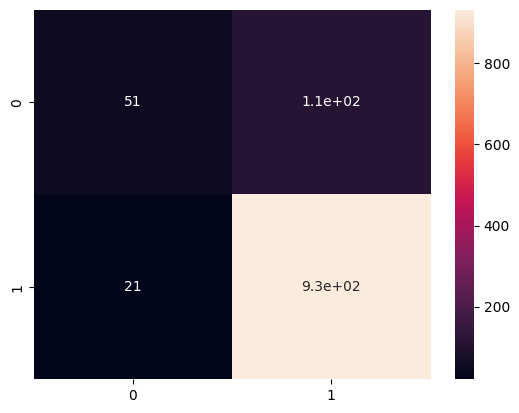

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##Training Logistic regression model



In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

0.9434470377019749

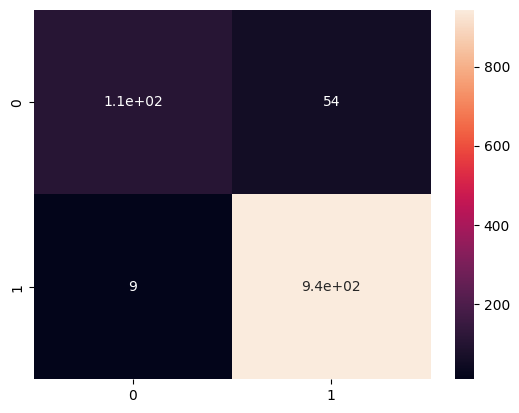

In [90]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##XG boost model

In [91]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

0.8931777378815081

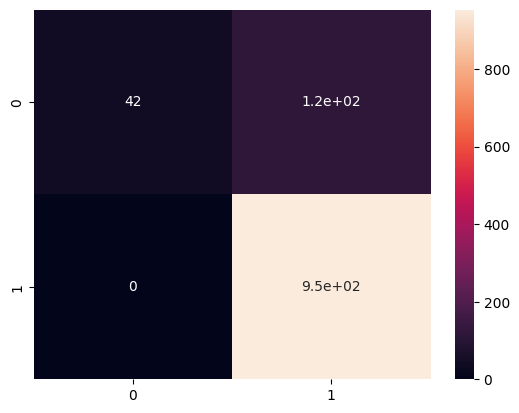

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)


##Training a random forest model

In [93]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

0.8779174147217235

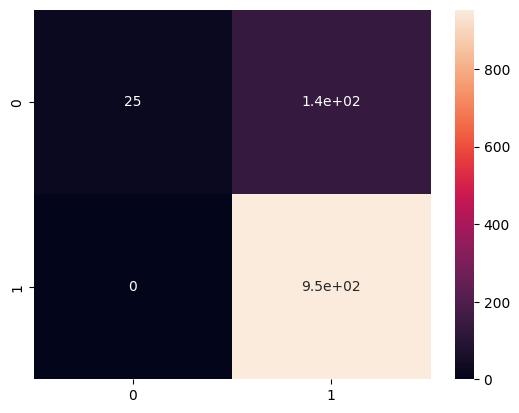

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##Training a svc model

In [95]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

0.8689407540394973

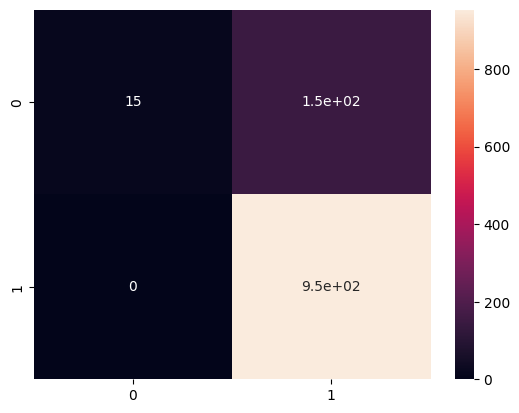

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

# Creating Gensim model trained on google news dataset

In [93]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')


[=-------------------------------------------------] 2.9% 47.7/1662.8MB downloaded

KeyboardInterrupt: 

In [ ]:
X=[]
for i in corpus:
  try:
    X.append(wv.get_mean_vector(i))
  except ValueError as e:
    print("\nfor value ", i , " we get error: ", e)


y = df["Label"].values


## Splitting data into training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

##Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train = np.stack(X_train)
X_test =  np.stack(X_test)

## Training naive bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##Training Logistic regression model



In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##XG boost model

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##GradientBoostingModel

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
print(accuracy_score(y_test, y_pred))


##Training a random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##Training a svc model

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

0.9440937781785392

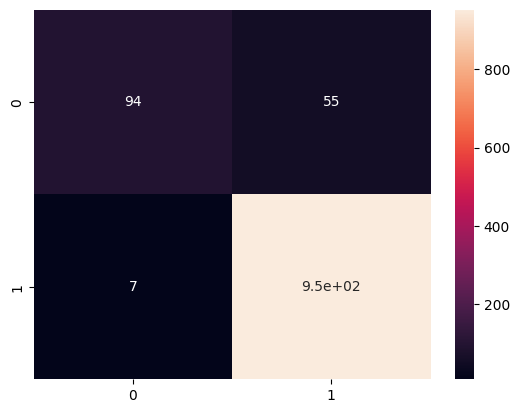

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

# Creating bag of Hashing Vector

In [97]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer()
X = hv.fit_transform(corpus).toarray()
y = df["Label"].values

## Splitting data into training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

##Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Training naive bayes model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##Training Logistic regression model



In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear',random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##XG boost model

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)


##Training a random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)

##Training a svc model

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
accuracy_score(y_test, y_pred)